In [59]:
import numpy as np
import matplotlib.pyplot as plt
from homework3 import gradient_descent

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### EX.1

In [60]:
"""
Exercise 1:
"""
def f(x):
    return ((x[0]-3)**2 + (x[1]-1)**2)


def grad_f(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])


n = 2

x0 = np.zeros(n)
x0_true=np.array([3,1])
kmax = 100
tolf = 1e-5
tolx = 1e-4
alphas=[1,.1,.01,'bk']
bk=False

res={}
z={}
xs={}

for alpha in alphas:
    if alpha == 'bk':
        bk=True
        alpa=.1
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    else:
        bk=False
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    
    xs[alpha]=x
    z[alpha]=np.linalg.norm(x0_true-x,axis=1)
    res[alpha] = err


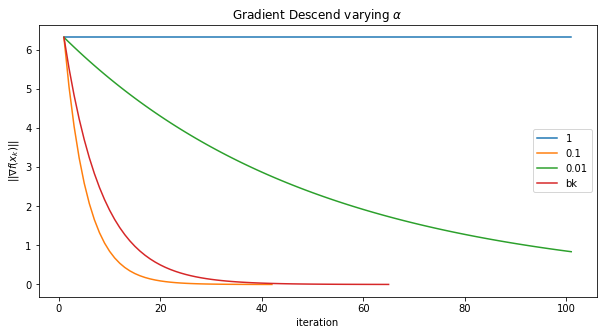

In [61]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

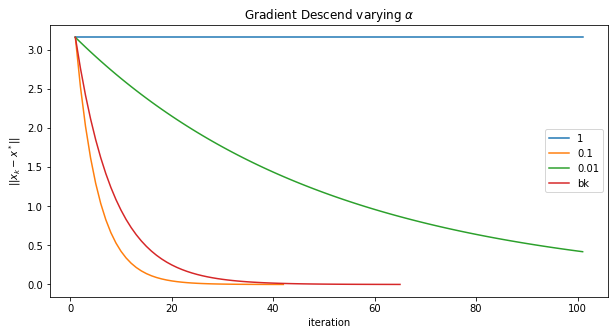

In [62]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in z.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||x_k-x^*||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

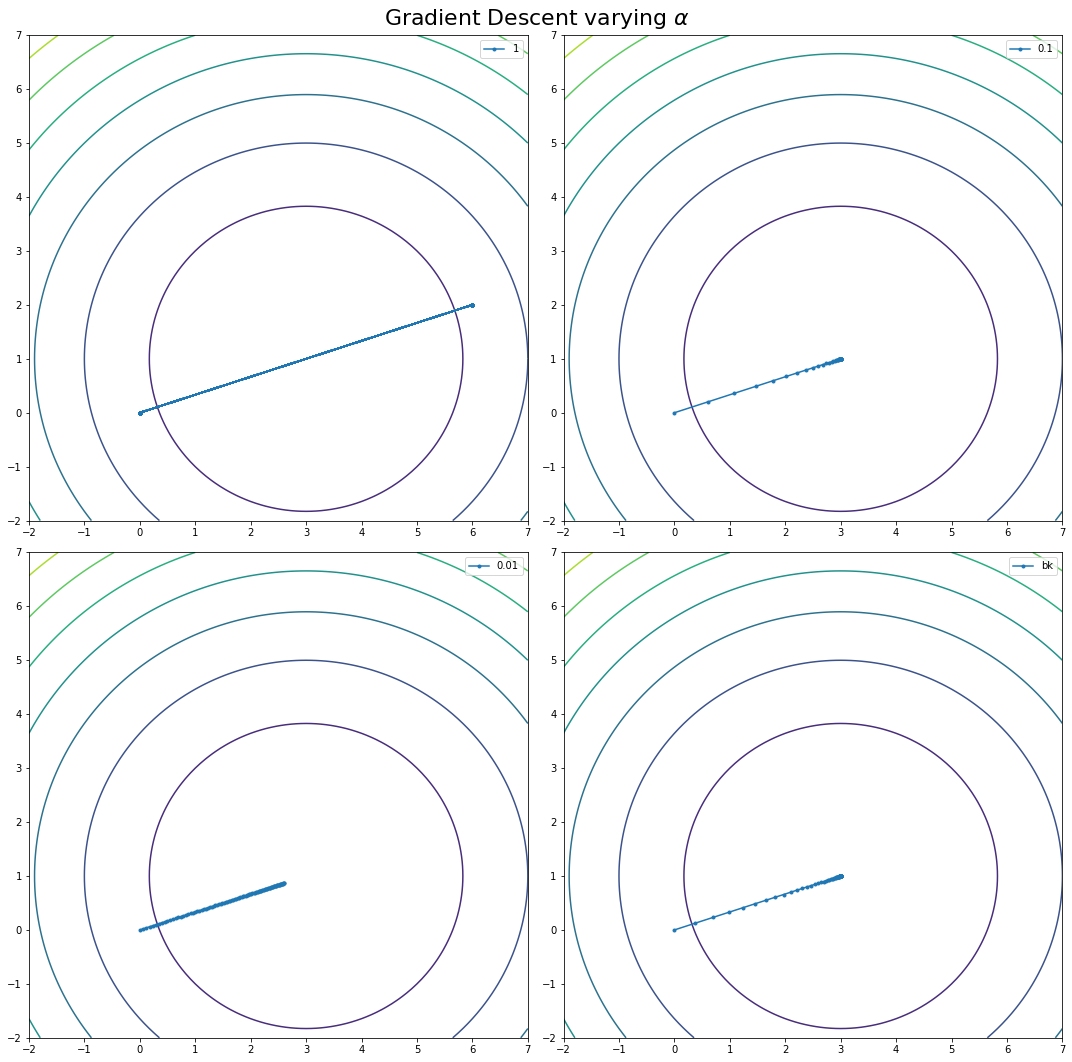

In [63]:
fig = plt.figure(figsize=(15, 15))

x_ax = np.linspace(-2, 7, 100)
y_ax = np.linspace(-2, 7, 100)

xv, yv = np.meshgrid(x_ax, y_ax)
z_ax = f([xv, yv])
fig.suptitle(r'Gradient Descent varying $\alpha$', size=22)

for i, (k,v) in zip(range(len(xs.keys())), xs.items()):
    plt.subplot(2, int(len(xs.keys())/2), i+1)

    contours = plt.contour(x_ax, y_ax, z_ax)

    plt.plot(v[:, 0], v[:, 1], '.-', label=k)
    plt.legend()

fig.tight_layout()
# fig.subplots_adjust(top=0.88)
plt.show()

### EX. 2

In [64]:
"""
Exercise 2:
"""
def f(x):
    return (10*(x[0]-1)**2 + (x[1]-2)**2)


def grad_f(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])


n = 2

x0 = np.zeros(n)
x0_true=np.array([1,2])
kmax = 100
tolf = 1e-5
tolx = 1e-4
alphas=[.1,.01,.005,'bk']
bk=False

res={}
z={}
xs={}

for alpha in alphas:
    if alpha == 'bk':
        bk=True
        alpa=.1
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    else:
        bk=False
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    
    xs[alpha]=x
    z[alpha]=np.linalg.norm(x0_true-x,axis=1)
    res[alpha] = err


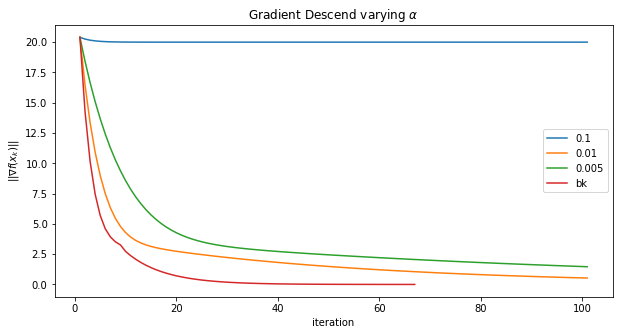

In [65]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

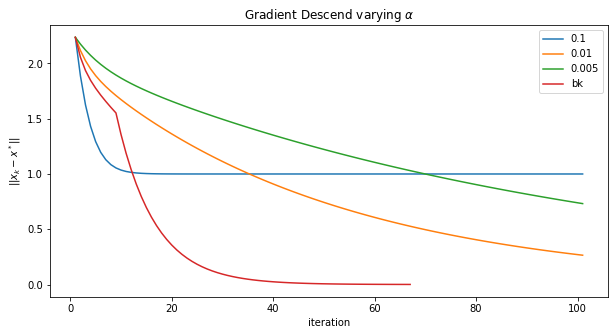

In [66]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in z.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||x_k-x^*||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

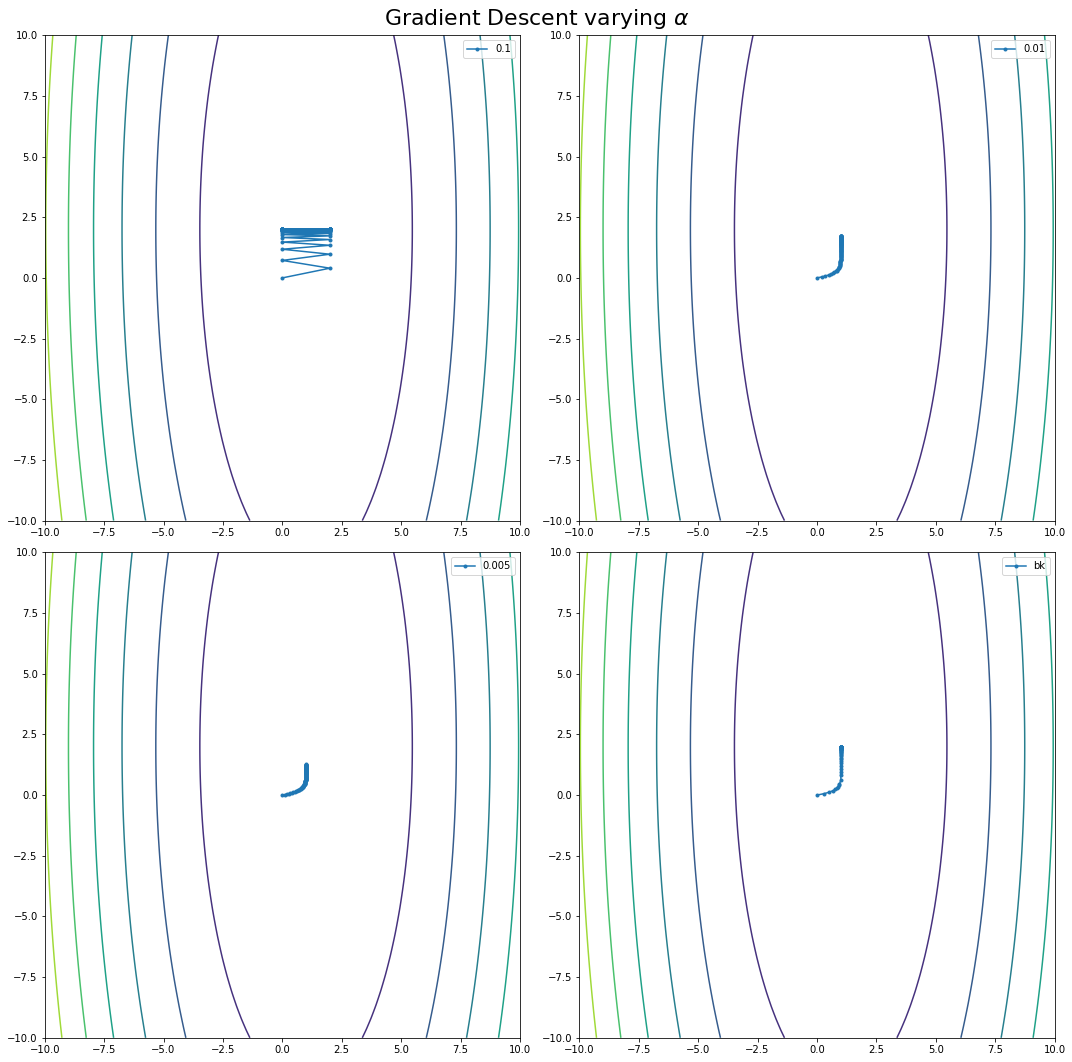

In [67]:
fig = plt.figure(figsize=(15, 15))

x_ax = np.linspace(-10, 10, 100)
y_ax = np.linspace(-10, 10, 100)

xv, yv = np.meshgrid(x_ax, y_ax)
z_ax = f([xv, yv])
fig.suptitle(r'Gradient Descent varying $\alpha$', size=22)

for i, (k,v) in zip(range(len(xs.keys())), xs.items()):
    plt.subplot(2, int(len(xs.keys())/2), i+1)

    contours = plt.contour(x_ax, y_ax, z_ax)

    plt.plot(v[:, 0], v[:, 1], '.-', label=k)
    plt.legend()

fig.tight_layout()
# fig.subplots_adjust(top=0.88)
plt.show()

### EX.3

In [79]:
"""
Exercise 3:
"""
def f(x):
    return .5*((np.linalg.norm(A@x-b))**2)


def grad_f(x):
    return (x.T@A.T -b.T)@A

n=5
np.random.seed(42)
x0 = np.random.rand(n)
kmax = 100
tolf = 1e-5
tolx = 1e-4
alphas=[.1,.01,.005,'bk']
bk=False

x_true = np.ones(n)
v = np.linspace(0,1,n)
A = np.vander(v, increasing=True)
b = A@x_true

res={}
gradss={}

for alpha in alphas:
    if alpha == 'bk':
        bk=True
        alpa=.1
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    else:
        bk=False
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    
    # z[alpha]=np.linalg.norm(x0_true-x,axis=1)
    gradss[alpha]=grads
    res[alpha] = err


Text(0.5, 1.0, 'Values of gradient components')

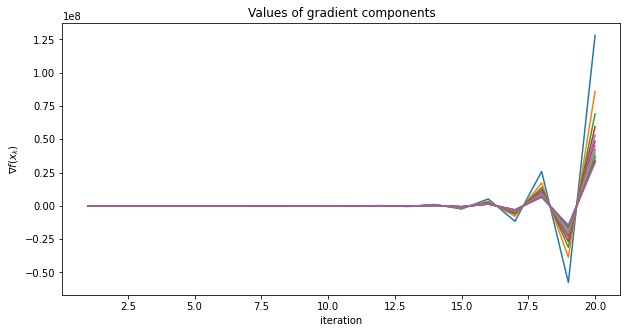

In [78]:
fig = plt.figure(figsize=(10, 5))

plt.plot(range(1, len(gradss[0.1][:20,:]) + 1), gradss[0.1][:20,:], '-')
plt.xlabel('iteration')
plt.ylabel(r'$\nabla f(x_k)$')
plt.title(r'Values of gradient components')

In [40]:
np.linalg.cond(A)

403234949934.73834

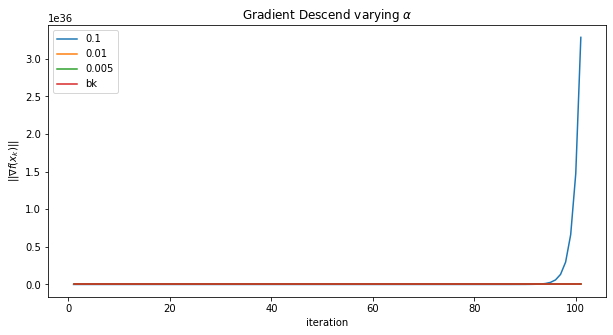

In [54]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

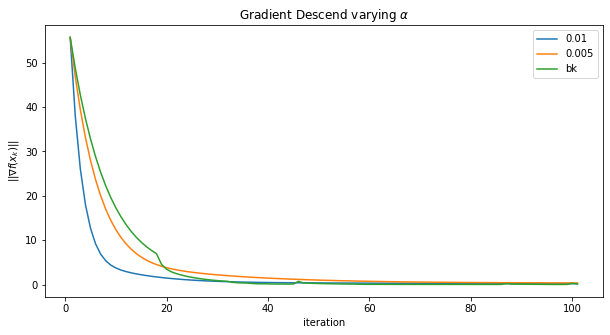

In [55]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    if k != 0.1:
        plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

### Ex.4

In [50]:
"""
Exercise 3:
"""
def f(x):
    return .5*((np.linalg.norm(A@x-b))**2) + .5*lamb*(np.linalg.norm(x))


def grad_f(x):
    return (x.T@A.T -b.T)@A + lamb*x.T

n=5
np.random.seed(42)
x0 = np.random.rand(n)
kmax = 100
tolf = 1e-5
tolx = 1e-4
alphas=[.1,.01,.005,'bk']
bk=False

x_true = np.ones(n)
v = np.linspace(0,1,n)
A = np.vander(v, increasing=True)
b = A@x_true
lamb=.25


res={}
z={}

for alpha in alphas:
    if alpha == 'bk':
        bk=True
        alpa=.1
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    else:
        bk=False
        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, bk)
    
    res[alpha] = err


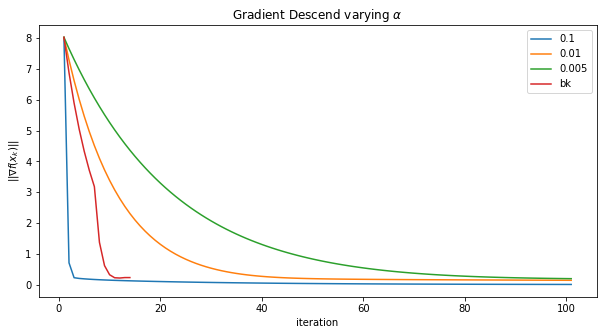

In [51]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

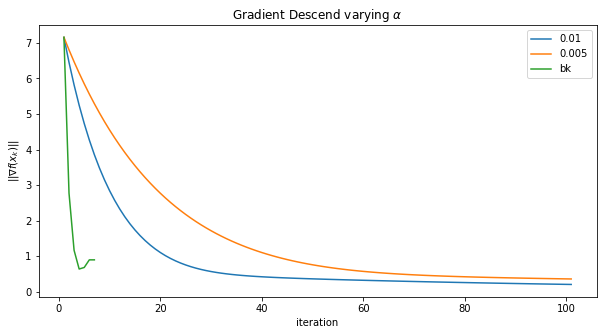

In [40]:
# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    if k != 0.1:
        plt.plot(range(1, len(v) + 1), v, '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Gradient Descend varying $\alpha$')
plt.show()

# SGD

In [23]:
from SGD import SGD
n = 10
N = 1000

np.random.seed(42)
w_true = np.ones((n,))
x = np.random.rand(N, n)

y = x @ w_true
y_tilde = x @ w_true + np.random.normal(0, 1, N)
z = x**2 @ w_true

def f(w, x, y):
    v = x @ w - y
    return np.linalg.norm(v)
    

def grad_f(w, x, y):
    return 2*((w.T @ x.T - y.T) @ x)
    
# try with different batch size, 
w0 = np.random.rand(n)
data = [x,y]
batch_size = 100
n_epochs = 50
alpha=1e-2

# w_approx, f_val, grads, err = SGD(f, grad_f, w0, data, batch_size, n_epochs, alpha)


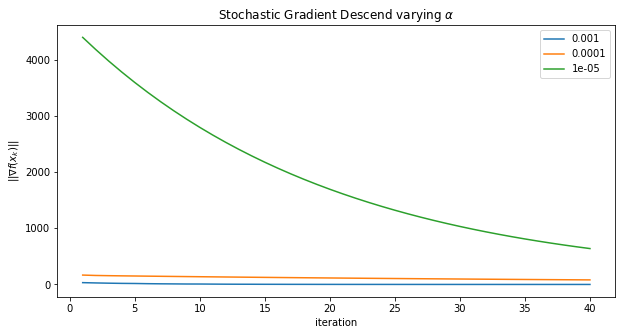

In [24]:
res={}
w0 = np.random.rand(n)
data = [x,y]
batch_size = 100
n_epochs = 50
alphas=[1e-3,1e-4,1e-5]

for alpha in alphas:
    w_approx, f_val, grads, err = SGD(f, grad_f, w0, data, batch_size, n_epochs, alpha)
    res[alpha]=err

# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v[10:]) + 1), v[10:], '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Stochastic Gradient Descend varying $\alpha$')
plt.show()


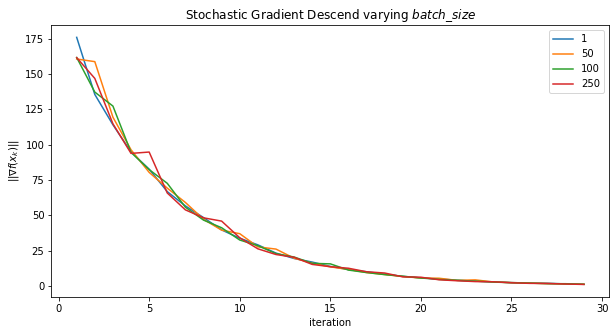

In [29]:
res={}
alpha=1e-3
n_epochs=30
batch_sizes=[1,50,100,250]
for batch_size in batch_sizes:
    w_approx, f_val, grads, err = SGD(f, grad_f, w0, data, batch_size, n_epochs, alpha)
    res[batch_size]=err

# Plot error
fig = plt.figure(figsize=(10, 5))
for k, v in res.items():
    plt.plot(range(1, len(v[1:]) + 1), v[1:], '-', label=k)

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'$||\nabla f(x_k)||$')
plt.title(r'Stochastic Gradient Descend varying $batch\_size$')
plt.show()
